In [1]:
#linear 

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
data=load_iris()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm_model=SVC(kernel='linear')
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of SVM : {accuracy:.2f}')

Accuracy of SVM : 1.00


Accuracy of SVM: 0.90


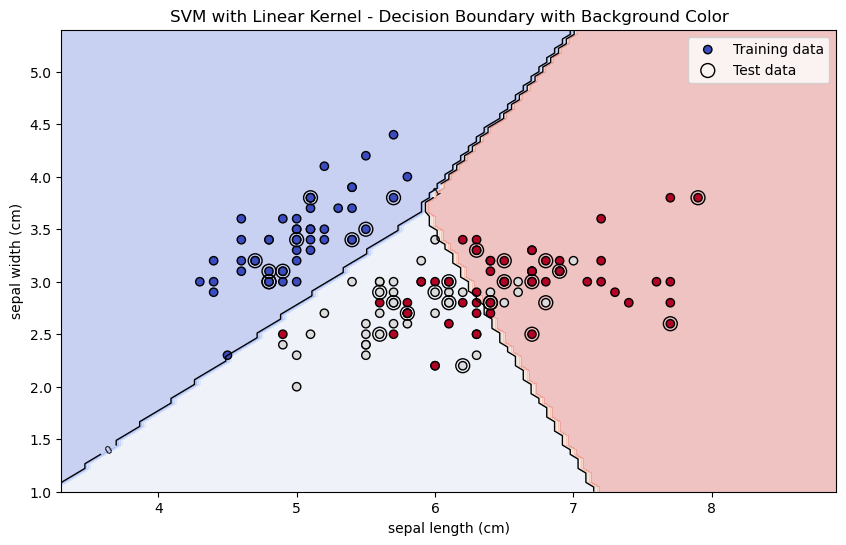

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # Use only the first two features for 2D plotting
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy:.2f}')

# Plotting the decision boundary for each class
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Get the predictions for the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the background color based on predictions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], facecolors='none', edgecolors='k', s=100, label='Test data')

# Plot the decision boundaries
contours = plt.contour(xx, yy, Z, colors='k', linewidths=1, levels=np.unique(Z))
plt.clabel(contours, inline=True, fontsize=8)

plt.title('SVM with Linear Kernel - Decision Boundary with Background Color')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()
